# Motor Controller Sizing

There are a lot of things that go into sizing a motor controller. This will look at the torque needed to climb an incline. From that, and some data *found on the internet*, we can assume the required current and choose our motor controller.

## Setup Needed Functions and Libraries

In [70]:
from __future__ import division
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sin, pi, tan

![](./fbd.png)

R2 isn't expected to do a lot of up hill climbing. For reference, power wheelchair ramp slope is 7.2 degrees to bound what kind of slope R2 could encounter in the school.

First, let's build a bunch of Imperial to SI units coversions.

In [71]:
def lbf2N(w):
    return w*4.448

def deg2rad(d):
    return d*pi/180

def in2mm(i):
    return i*25.4

def Nm2lbfin(nm):
    return nm*8.851

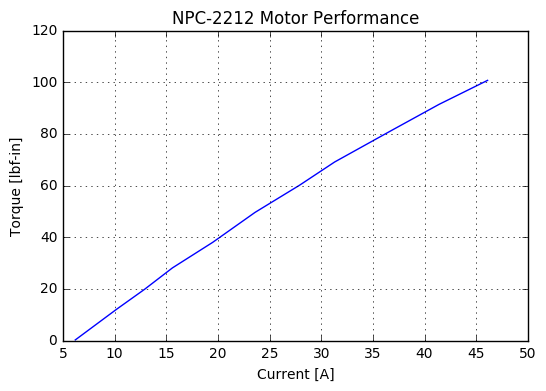

In [72]:
# unknown table of values for motors
motor_t = [.22, 12.1, 19.8, 28.1, 38, 49.6, 60.1, 69.1, 81.3, 91.4, 100.7]  # lbf-in
motor_c = [6.2, 10.2, 12.9, 15.6, 19.5, 23.6, 27.9, 31.3, 36.8, 41.4, 46.1]  # Amps

plt.plot(motor_c, motor_t)
plt.grid(True)
plt.xlabel('Current [A]')
plt.ylabel('Torque [lbf-in]')
plt.title('NPC-2212 Motor Performance')

In [84]:
def force_total(inc):
    """Calculate the total force the wheels must overcome. This
    is a function of both gravity pulling the robot down the ramp
    and the frictional force between the wheels and the floor.
    
    Returns the force ONE motor must overcome to not slide down the ramp.
    """
    w_N = lbf2N(90)       # weight in N
    
    # http://www.engineeringtoolbox.com/rolling-friction-resistance-d_1303.html
    # 0.03 car tires on cobbles  - large worn
    frict_coeff = 0.03    # coefficient of friction, guess based on searching internet
    
    force_fric = w_N*frict_coeff*2  # 2 leg wheels on the floor
    force_incline = w_N*sin(deg2rad(inc))  # gravity pulling the robot down the ramp
    return (force_fric + force_incline)/2  # divide by 2 because 2 leg motors

def torque(f):
    r_wheel = in2mm(2.5)  # wheel radius in mm
    return f*r_wheel/1000

## Flat Floor

In [85]:
f = force_total(0)
t = torque(f)

print('force', f, 'N')
print('torque', t, ' Nm  or ', Nm2lbfin(t), 'lbf-in')

force 12.0096 N
torque 0.7626096  Nm  or  6.7498575696 lbf-in


## Wheelchair Ramp

If we look at the robot climbing a wheelchair ramp (7.2 deg), then the force/torques to not fall are:

In [86]:
f = force_total(7.2)
t = torque(f)

print('force', f, 'N')
print('torque', t, ' Nm  or ', Nm2lbfin(t), 'lbf-in')

force 37.0963000302 N
torque 2.35561505192  Nm  or  20.8495488245 lbf-in


## Range of Incline Angles

In [87]:
def wrapper(angles):
    """This is just a wrapper on the above functions so it is easier to find
    the needed torque.
    
    Arguments:
        angles: an array of angles in degrees
        
    Returns an array of torques
    """
#     w_N = lbf2N(70)  # robot weight in N
#     frict_coeff = 0.15
#     r_wheel = in2mm(2.5)  # wheel radius in mm
    t = []  # output array of torques
    for a in angles:
        ff = force_total(a)
        tt = torque(ff)
        t.append(Nm2lbfin(tt))
    return t

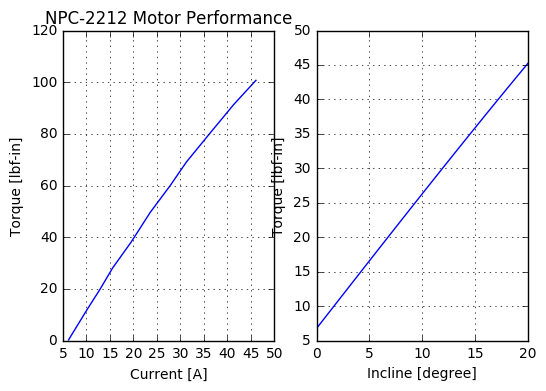

In [89]:
# plot some stuff
plt.subplot(1, 2, 1)
plt.plot(motor_c, motor_t)
plt.grid(True)
plt.xlabel('Current [A]')
plt.ylabel('Torque [lbf-in]')
plt.title('NPC-2212 Motor Performance')

plt.subplot(1,2,2)
x = range(0, 21)
y = wrapper(x)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('Incline [degree]')
plt.ylabel('Torque [lbf-in]')

# Conclusions

Given that R2 will operate on flat or *maybe* roll up wheelchair ramps, a Motor Controller capabile of proving 15-20 A would be more than sufficient. The robot's weight was increased from the Final report estimate of 71 lbs to 90 lbs and the coefficient of friction was taken as the worst case found on an engineering table for coefficients for car wheels.

Atleast, it is shown here that the current motor controller which provide 80A per channel is excessive for R2's needs. This is also held up by the fact, R2's motors are currently fused at 30A and we have not blown those fuses during operation.

------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.